In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline  

def warm_up_exercise():
    print('warm_up_exercise')
    return np.eye(5)


def compute_cost(X, y, theta):
    m = y.size
    J = np.sum(np.square(X.dot(theta) - y)) / (2 * m)

    return J


def gradient_descent(X, y, theta, alpha, iterations):
    m = y.size
    J_history = np.zeros(iterations)

    for i in range(iterations):
        h = X.dot(theta)
        theta = theta - alpha * (1 / m) * (X.T.dot(h - y))

        J_history[i] = compute_cost(X, y, theta)

    return (theta, J_history)

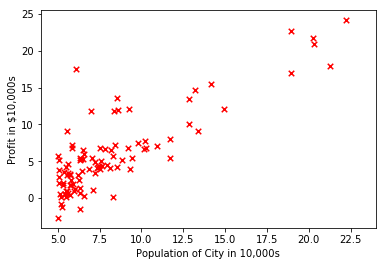

In [2]:
data = np.array(np.loadtxt("ex1data1.txt", dtype='float64', delimiter=','))

x = data[:, :1]
y = data[:, 1:2]

ones = np.transpose([np.ones(x.shape[0])])
X = np.hstack((ones, x))

plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');
plt.show()


theta initial value:
[[ 1.45484008]
 [ 1.41000353]]

Test compute_cost
theta is [0; 0] and compute_cost is  30.1805313843
Expected: 32.07
theta is [-1; 2] and compute_cost is  54.242455082
Expected: 54.24


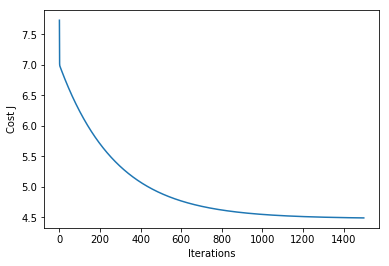

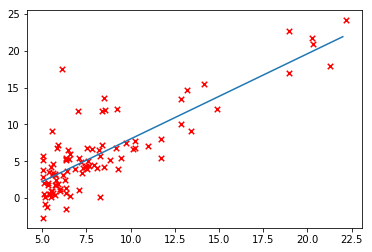

In [3]:
theta = np.random.randn(2).reshape((2,1))
print('\ntheta initial value:')
print(theta)

iterations = 1500
alpha = 0.01

print('\nTest compute_cost')
print('theta is [0; 0] and compute_cost is ', compute_cost(X, y, theta))
print('Expected: 32.07')
print('theta is [-1; 2] and compute_cost is ', compute_cost(X, y, np.array([[-1], [2]])))
print('Expected: 54.24')

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

xx = np.arange(5, 23)
yy = theta[0] + theta[1] * xx

# Gradient descent
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx, yy, label='Linear regression (Gradient descent)')
plt.show()

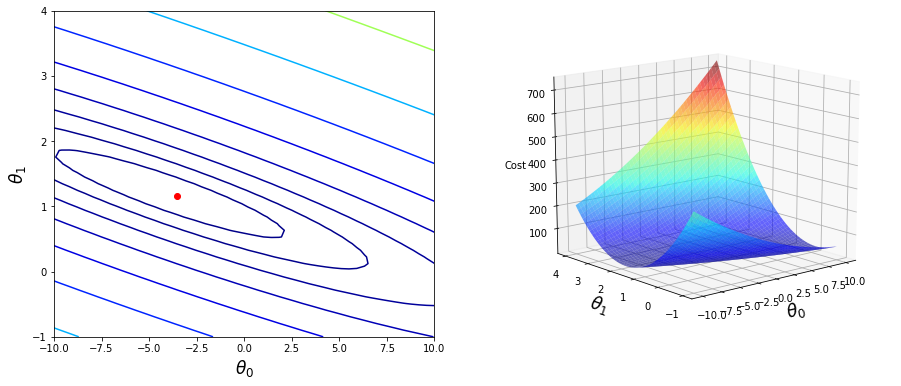

In [4]:
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = compute_cost(X, y, theta=[[xx[i, j]], [yy[i, j]]])

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0], theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(), Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)